In [124]:
%load_ext nb_black


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

pl.style.use("seaborn-whitegrid")
print(pl.style.available)
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<IPython.core.display.Javascript object>

In [126]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


<IPython.core.display.Javascript object>

In [127]:
df.shape

(1205, 14)

<IPython.core.display.Javascript object>

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


<IPython.core.display.Javascript object>

In [129]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

<IPython.core.display.Javascript object>

In [130]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


<IPython.core.display.Javascript object>

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

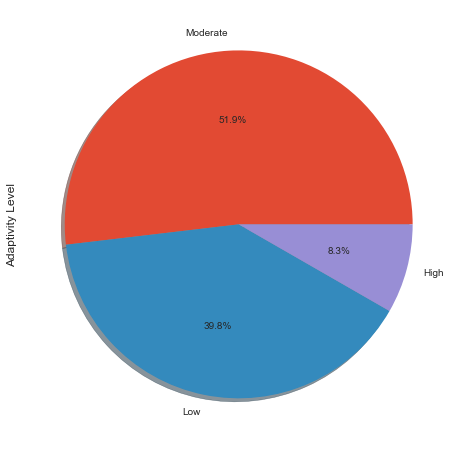

<IPython.core.display.Javascript object>

In [131]:
pl.figure(figsize=(8, 8))
df["Adaptivity Level"].value_counts().plot.pie(autopct="%1.1f%%", shadow=True)
df["Adaptivity Level"].value_counts()

In [132]:
df["Adaptivity Level"].value_counts().keys()

Index(['Moderate', 'Low', 'High'], dtype='object')

<IPython.core.display.Javascript object>

In [133]:
df["Adaptivity Level"].value_counts().values

array([625, 480, 100])

<IPython.core.display.Javascript object>

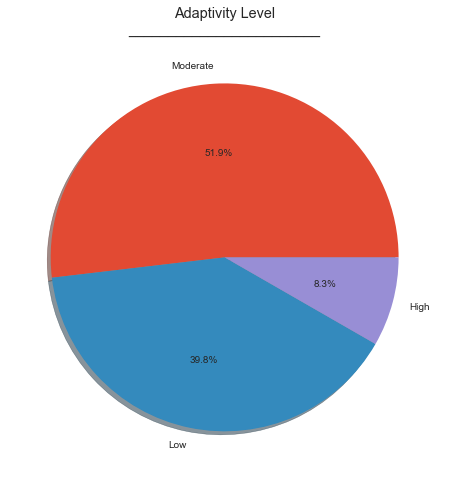

<IPython.core.display.Javascript object>

In [134]:
pl.figure(figsize=(8, 8))
pl.pie(
    x=df["Adaptivity Level"].value_counts().values,
    labels=df["Adaptivity Level"].value_counts().keys(),
    autopct="%.1f%%",
    shadow=True,
)
pl.title("Adaptivity Level\n________________________")
pl.show()

In [135]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


<IPython.core.display.Javascript object>

In [136]:
round(
    ((df["Gender"].value_counts() / sum(df["Gender"].value_counts().values)) * 100), 2
)

Boy     55.02
Girl    44.98
Name: Gender, dtype: float64

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Gender distribution')

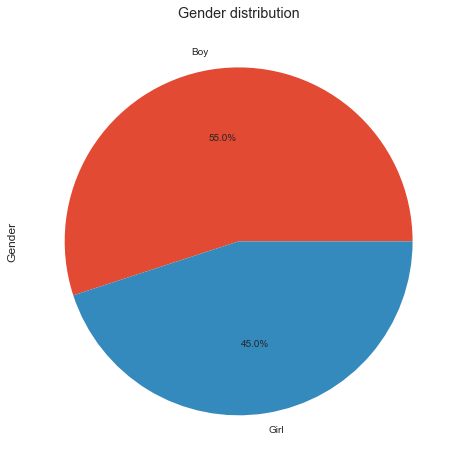

<IPython.core.display.Javascript object>

In [137]:
pl.figure(figsize=(8, 8))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%")
pl.title("Gender distribution")

Text(0.5, 1.0, 'Device distribution')

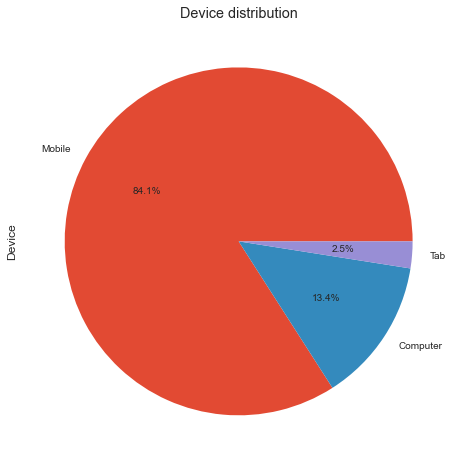

<IPython.core.display.Javascript object>

In [138]:
pl.figure(figsize=(8, 8))
df["Device"].value_counts().plot.pie(autopct="%1.1f%%")
pl.title("Device distribution")

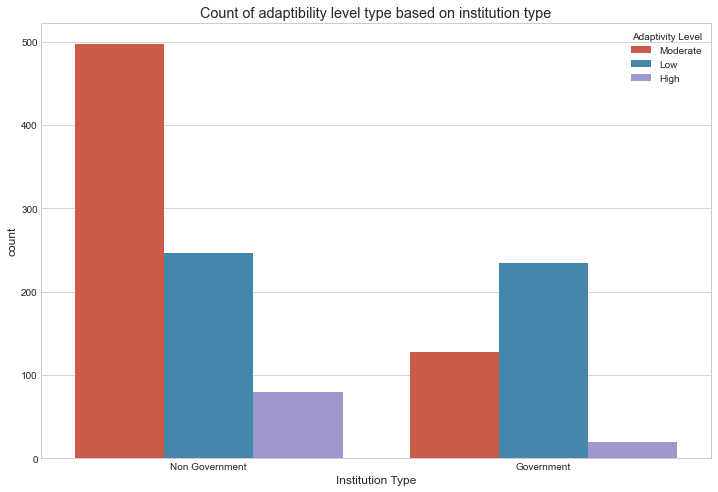

<IPython.core.display.Javascript object>

In [139]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Institution Type"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on institution type")
pl.show()

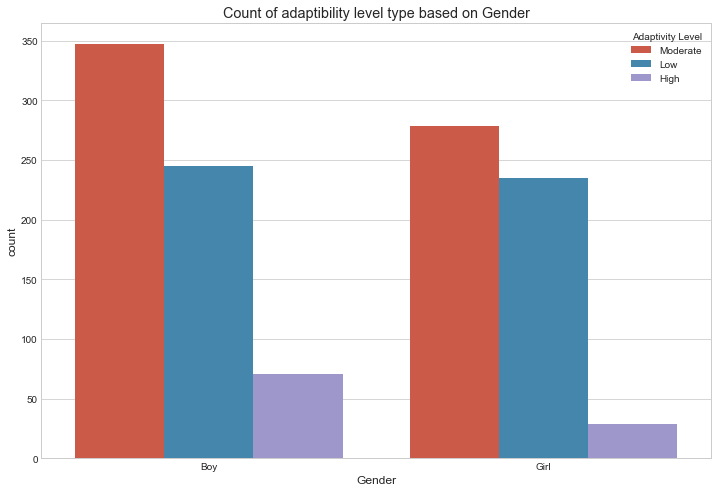

<IPython.core.display.Javascript object>

In [140]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Gender"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on Gender")
pl.show()

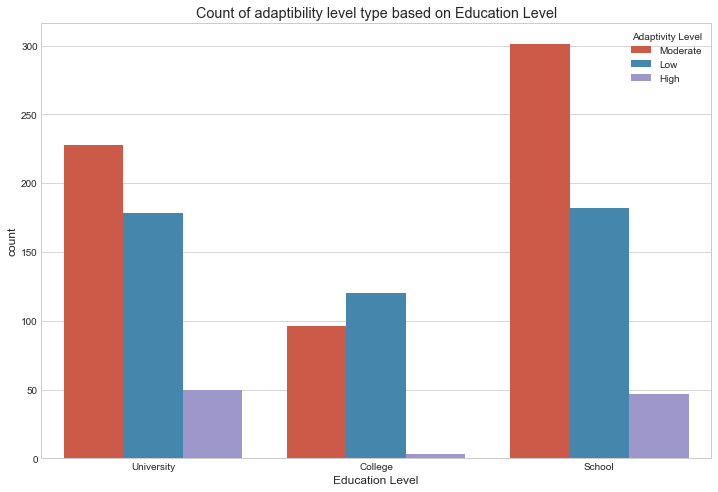

<IPython.core.display.Javascript object>

In [141]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Education Level"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on Education Level")
pl.show()

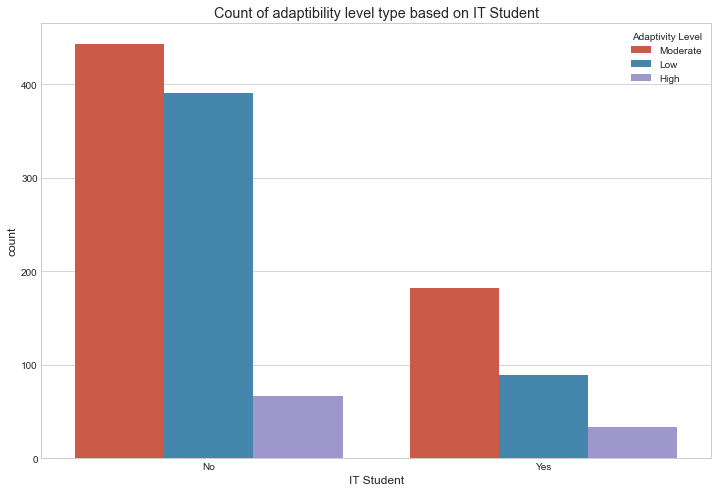

<IPython.core.display.Javascript object>

In [142]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["IT Student"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on IT Student")
pl.show()

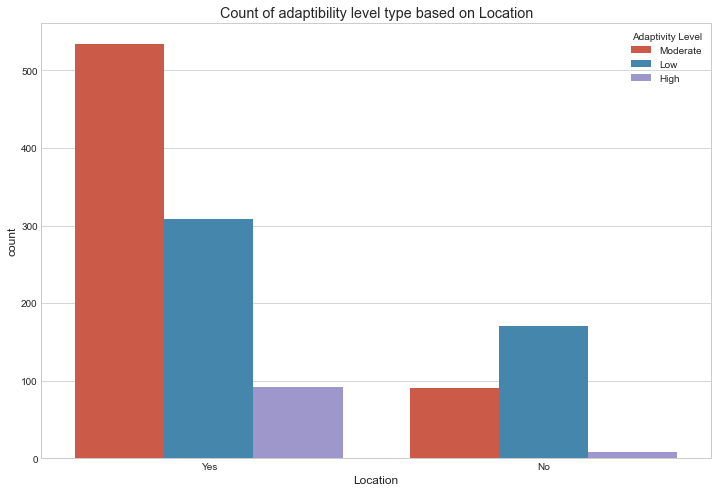

<IPython.core.display.Javascript object>

In [143]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Location"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on Location")
pl.show()

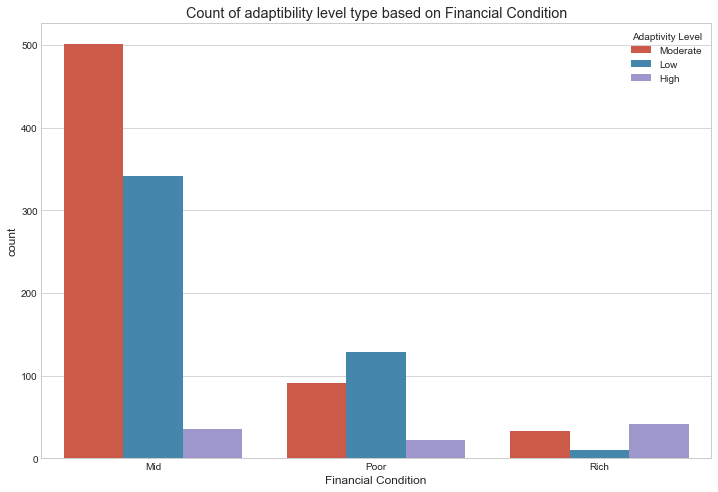

<IPython.core.display.Javascript object>

In [144]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Financial Condition"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on Financial Condition")
pl.show()

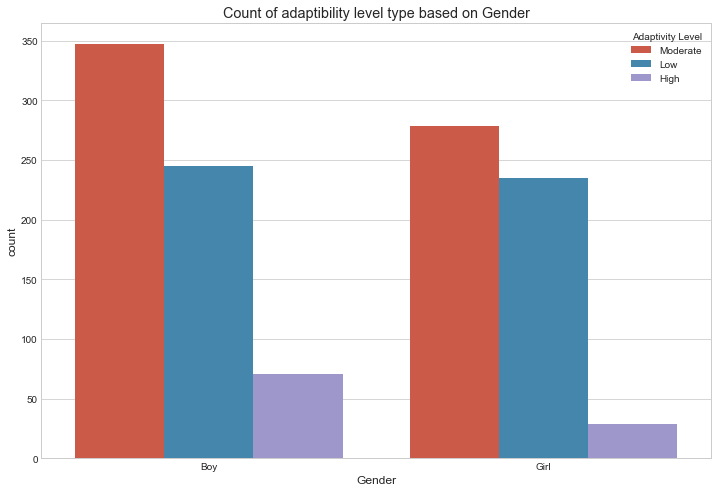

<IPython.core.display.Javascript object>

In [145]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Gender"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on Gender")
pl.show()

In [146]:
"Boys are seen making more progress as compared to girls"

'Boys are seen making more progress as compared to girls'

<IPython.core.display.Javascript object>

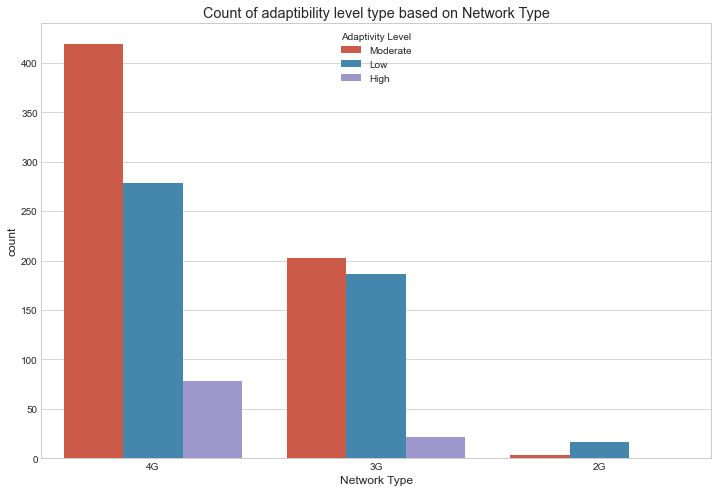

<IPython.core.display.Javascript object>

In [147]:
pl.figure(figsize=(12, 8))
sns.countplot(data=df, x=df["Network Type"], hue=df["Adaptivity Level"])
pl.title("Count of adaptibility level type based on Network Type")
pl.show()

In [148]:
# Students using 4G and network 4g has more progress rate

<IPython.core.display.Javascript object>

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler

<IPython.core.display.Javascript object>

In [150]:
for column in df.columns:
    print(df[column].dtypes)

object
object
object
object
object
object
object
object
object
object
object
object
object
object


<IPython.core.display.Javascript object>

In [151]:
data = df.copy()

<IPython.core.display.Javascript object>

In [152]:
for column in data.columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

<IPython.core.display.Javascript object>

In [153]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


<IPython.core.display.Javascript object>

In [154]:
X = data.drop(columns="Adaptivity Level")
y = data["Adaptivity Level"]

<IPython.core.display.Javascript object>

In [155]:
X.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0,3,2,1,0,1,1,0,1,2,2,0,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1
2,1,2,0,0,0,1,1,0,1,2,1,0,1
3,1,1,1,1,0,1,1,0,0,2,1,0,1
4,1,2,1,1,0,1,1,1,0,1,0,0,1


<IPython.core.display.Javascript object>

In [156]:
y.head()

0    2
1    2
2    2
3    2
4    1
Name: Adaptivity Level, dtype: int64

<IPython.core.display.Javascript object>

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<IPython.core.display.Javascript object>

In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((903, 13), (302, 13), (903,), (302,))

<IPython.core.display.Javascript object>

In [159]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SV = SVC()

<IPython.core.display.Javascript object>

In [160]:
algos = [LR, DTR, RFR, KNR, MLP, XGB, SV]

<IPython.core.display.Javascript object>

In [161]:
data = dict()
for algo in algos:
    algo.fit(X_train, y_train)
    ypred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, ypred) * 100
    data.update({algo.__class__.__name__: accuracy})
    performance_data.append(data)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<IPython.core.display.Javascript object>

In [162]:
data

{'LogisticRegression': 70.86092715231787,
 'DecisionTreeClassifier': 90.06622516556291,
 'RandomForestClassifier': 91.3907284768212,
 'KNeighborsClassifier': 76.49006622516556,
 'MLPClassifier': 81.12582781456953,
 'XGBClassifier': 91.3907284768212,
 'SVC': 76.82119205298014}

<IPython.core.display.Javascript object>

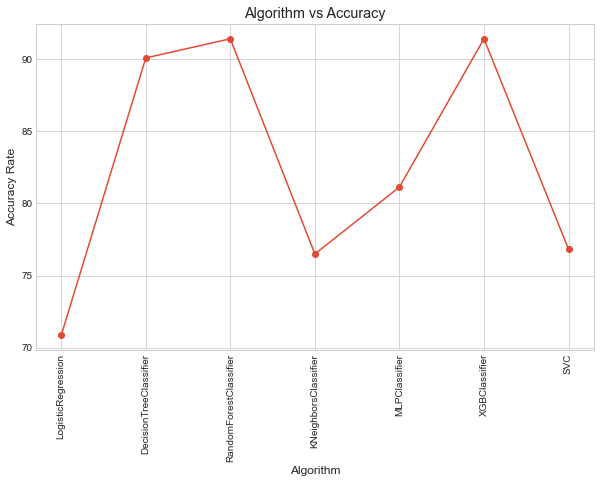

<IPython.core.display.Javascript object>

In [165]:
pl.figure(figsize=(10, 6))
pl.title("Algorithm vs Accuracy")
pl.plot(data.keys(), data.values(), marker="o")
pl.xlabel("Algorithm")
pl.ylabel("Accuracy Rate")
pl.xticks(rotation=90)
pl.show()